# Future Temperature Prediction 
## using SARIMAX

### about SARIMAX
Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors (SARIMAX) is a statistical modeling technique used for time series forecasting. It's an extension of the ARIMA (AutoRegressive Integrated Moving Average) model that incorporates seasonal components and exogenous variables.

In [2]:
import os
! pip install opencv-python
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVC
import numpy as np

ERROR: Could not find a version that satisfies the requirement opencv-python (from versions: none)
ERROR: No matching distribution found for opencv-python
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
train0=pd.read_csv('DailyDelhiClimateTrain.csv')
test0=pd.read_csv('DailyDelhiClimateTest.csv')

In [4]:
print(train0.columns.tolist())
print(test0.columns.tolist())

['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']
['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']


In [5]:
train0=train0.iloc[0:-1,:]
display(train0)
display(test0)
print(len(train0))

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


1461


In [6]:
#data0=pd.concat([train0,test0],axis=0)
train1=train0[['date','meantemp']]
test1=test0[['date','meantemp']]

In [7]:
train1["date"] = pd.to_datetime(train1["date"])-pd.Timestamp("2013-01-01")
test1["date"] = pd.to_datetime(test1["date"])-pd.Timestamp("2013-01-01")
train1["date"]=(train1["date"]/np.timedelta64(1,'D'))
test1["date"]=(test1["date"]/np.timedelta64(1,'D'))
display(train1[0:3])

/var/folders/4f/0qgxggzd35j3d8dc232z56440000gn/T/ipykernel_5288/3943289439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1["date"] = pd.to_datetime(train1["date"])-pd.Timestamp("2013-01-01")
/var/folders/4f/0qgxggzd35j3d8dc232z56440000gn/T/ipykernel_5288/3943289439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["date"] = pd.to_datetime(test1["date"])-pd.Timestamp("2013-01-01")
/var/folders/4f/0qgxggzd35j3d8dc232z56440000gn/T/ipykernel_5288/3943289439.py:3: SettingWithCopyWarning: 
A va

,date,meantemp
0,0.0,10.000000
1,1.0,7.400000
2,2.0,7.166667


In [8]:
display(train1[0:2])
display(test1[0:2])

,date,meantemp
0,0.0,10.0
1,1.0,7.4


,date,meantemp
0,1461.0,15.913043
1,1462.0,18.500000


In [9]:
print(train1['meantemp'][-365:].mean())
print(train1['meantemp'][-365:].median())
print((train1['meantemp'][-365:].max()+train1['meantemp'][-365:].min())/2)

27.13731572741664
29.53333333333333
24.730113636363637


# SARIMAX

In [10]:
print(len(train1),len(test1))

1461 114


    # Optimize order and seasonal_order (take time)
    time_series_data=train1['meantemp']

    param_grid = {
        'order': [(p, d, q) for p in range(1,2) for d in range(1,2) for q in range(1,2)],
        'seasonal_order': [(P, D, Q, S) for P in range(1,2) for D in range(1,2) for Q in range(1,2) for S in [365]]
    }

    best_score = float('inf')
    best_params = None

    for order in param_grid['order']:
        for seasonal_order in param_grid['seasonal_order']:
            model = SARIMAX(time_series_data, order=order, seasonal_order=seasonal_order)
            fitted_model = model.fit()
            score = fitted_model.aic  

            if score < best_score:
                best_score = score
                best_params = {'order': order, 'seasonal_order': seasonal_order}

    print("Best Parameters:", best_params)

    order = best_params['order']
    seasonal_order = best_params['seasonal_order'] 
    print(order)
    print(seasonal_order)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03877D+00    |proj g|=  1.84773D-01

At iterate    5    f=  1.91275D+00    |proj g|=  6.11592D-02

At iterate   10    f=  1.90019D+00    |proj g|=  7.67876D-03

At iterate   15    f=  1.89483D+00    |proj g|=  3.99602D-03

At iterate   20    f=  1.89449D+00    |proj g|=  1.93709D-03

At iterate   25    f=  1.89446D+00    |proj g|=  7.20613D-04

At iterate   30    f=  1.89445D+00    |proj g|=  1.04728D-04

At iterate   35    f=  1.89445D+00    |proj g|=  4.08407D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

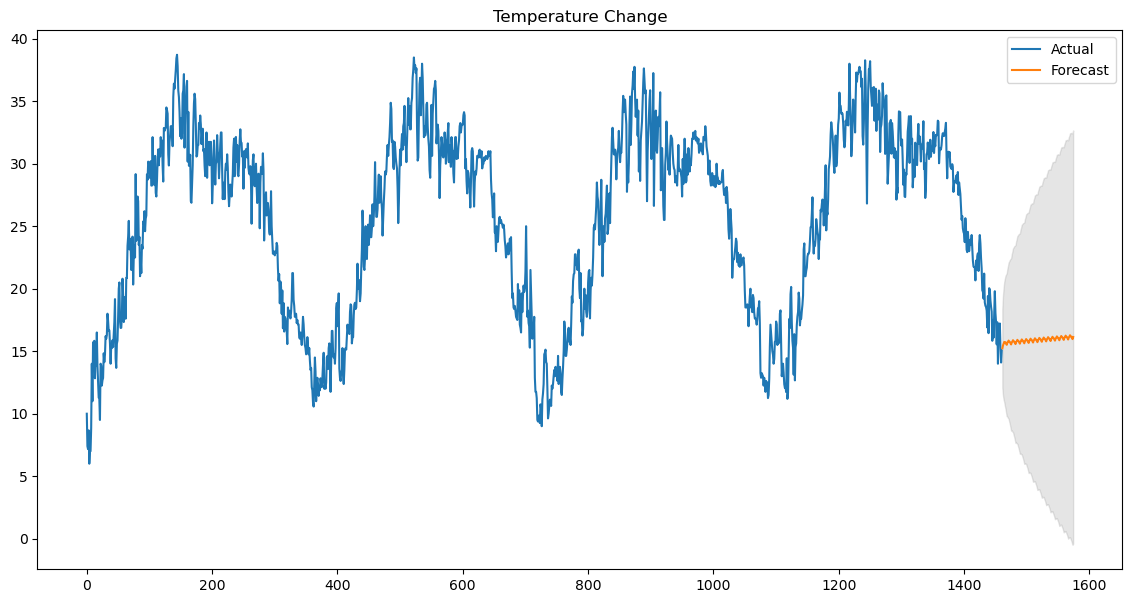

In [11]:
order=(1,1,1)
seasonal_order=(1,1,1,7)

# Predict Future
model = SARIMAX(train1.iloc[:,1], order=order, seasonal_order=seasonal_order)
results = model.fit()

results.params

#predict future
forecast_steps = len(test1)
forecast = results.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

n=len(train1)
plt.figure(figsize=(14,7))
plt.plot(train1.iloc[:,1], label='Actual')
plt.plot(range(n,n+forecast_steps), forecasted_values, label='Forecast')
plt.fill_between(range(n,n+forecast_steps),
                 np.array(confidence_intervals)[:,0],
                 np.array(confidence_intervals)[:,1], 
                 color='gray', alpha=0.2)
plt.title('Temperature Change')
plt.legend()
plt.show()

In [12]:
#predict past
prediction_steps = len(train1)  # Number of past periods you want to predict
prediction = results.get_prediction(start=0, end=prediction_steps-1)  # Specify the range of past periods
train_temp_pred = prediction.predicted_mean
past_confidence_intervals = prediction.conf_int()

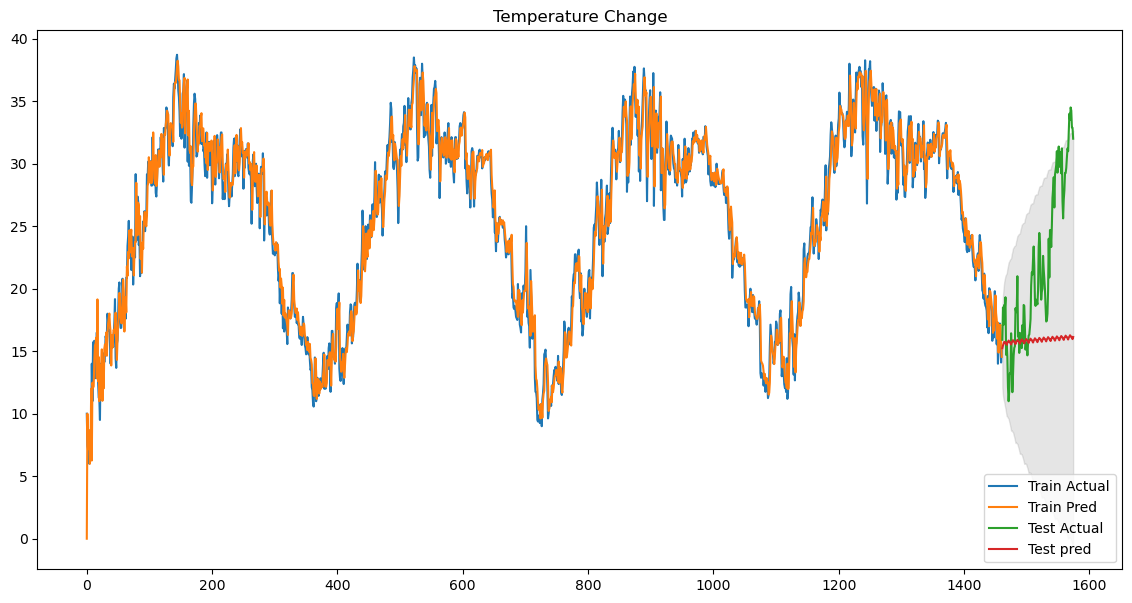

In [13]:
n=len(train1)
plt.figure(figsize=(14,7))
plt.plot(range(n), train1.iloc[:,1], label='Train Actual')
plt.plot(range(n), train_temp_pred, label='Train Pred')
plt.plot(range(n, n+forecast_steps), test1.iloc[:,1], label='Test Actual')
plt.plot(range(n, n+forecast_steps), forecasted_values, label='Test pred')
plt.fill_between(range(n,n+forecast_steps),
                 np.array(confidence_intervals)[:,0],
                 np.array(confidence_intervals)[:,1], 
                 color='gray', alpha=0.2)
plt.title('Temperature Change')
plt.legend()
plt.show()

In [14]:
train_pred = train_temp_pred
train_true = train1['meantemp']
err = train_pred - train_true

In [15]:
test_pred=forecasted_values
test_true=test1['meantemp']

# Evaluate the model performance
mse = mean_squared_error(test_true, test_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 72.2590083112721


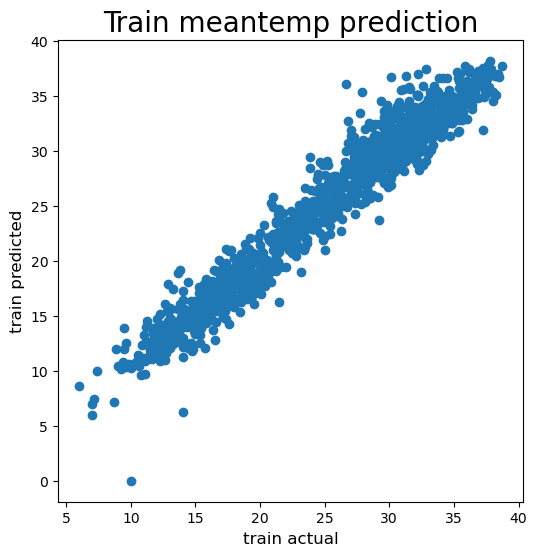

In [16]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Train meantemp prediction',fontsize=20)
ax.set_ylabel('train predicted',fontsize=12)
ax.set_xlabel('train actual',fontsize=12)
ax.scatter(train_true,train_pred)
plt.show()

In [17]:
train0["date"] = pd.to_datetime(train0["date"])
test0["date"] = pd.to_datetime(test0["date"])

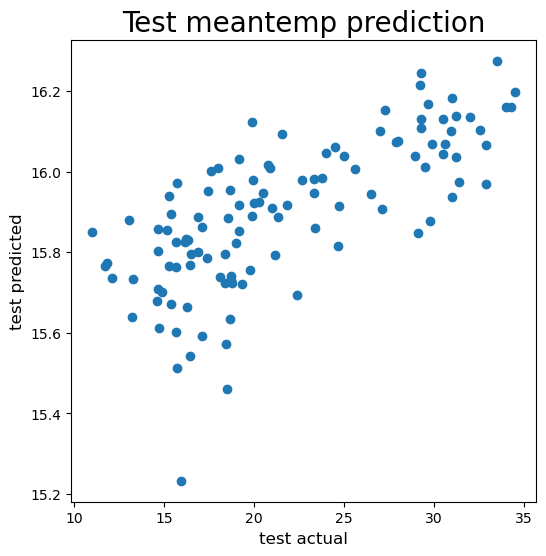

In [18]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title('Test meantemp prediction',fontsize=20)
ax.set_ylabel('test predicted',fontsize=12)
ax.set_xlabel('test actual',fontsize=12)
ax.scatter(test_true,test_pred)
plt.show()

In [19]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=test0['date'],y=test_true,name='Actual'),secondary_y=False,)
fig.add_trace(go.Scatter(x=test0['date'],y=test_pred,name='Predicted'),secondary_y=False,)

fig.update_layout(autosize=False,width=700,height=500,title_text="Temperature during test period")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Degree",secondary_y=False)
fig.show()

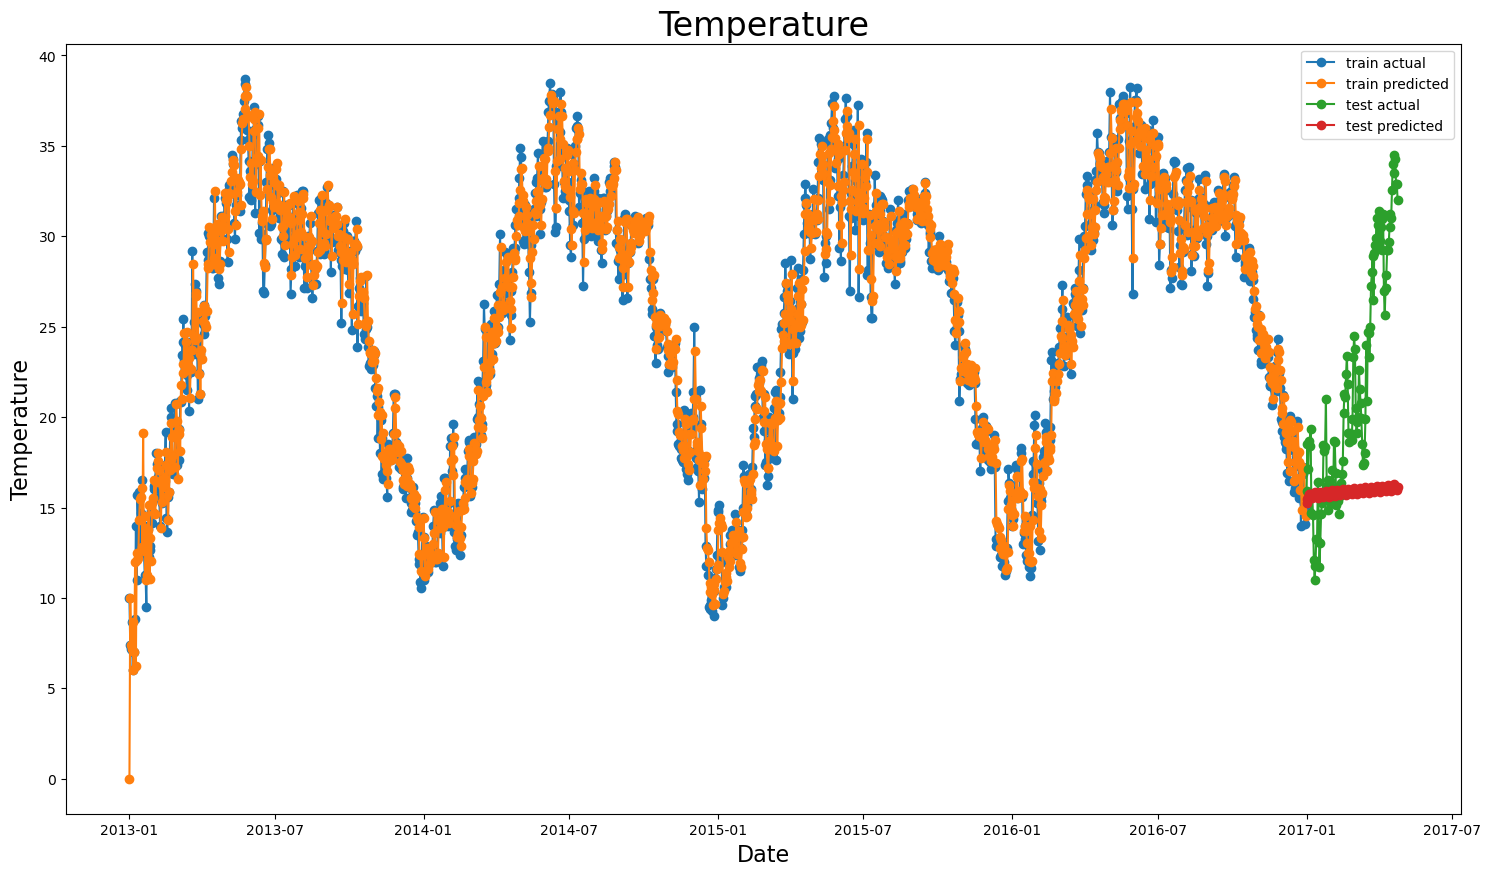

In [20]:
plt.figure(figsize=(18,10))
plt.plot(train0['date'],train_true,'-o',label='train actual')
plt.plot(train0['date'],train_pred,'-o',label='train predicted')
plt.plot(test0['date'],test_true,'-o',label='test actual')
plt.plot(test0['date'],test_pred,'-o',label='test predicted')
plt.title('Temperature',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Temperature',size=16)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


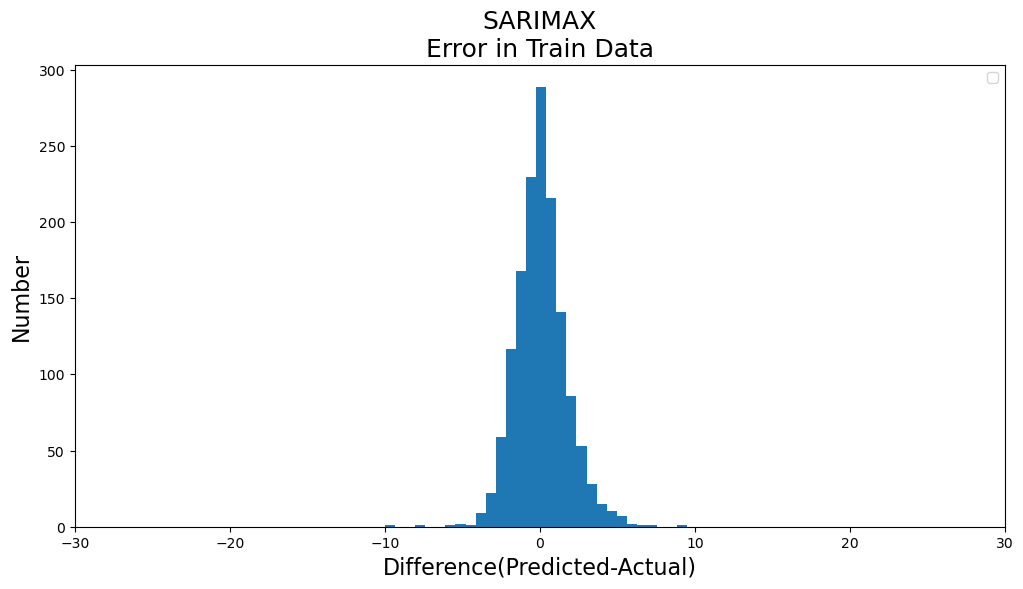

In [21]:
plt.figure(figsize=(12,6))
plt.hist(err,bins=30)
plt.xlabel('Difference(Predicted-Actual)',size=16)
plt.ylabel('Number',size=16)
plt.legend()
plt.xlim((-30,+30))
plt.title(f'SARIMAX\nError in Train Data',size=18)
plt.show()

* https://www.kaggle.com/stpeteishii/future-temperature-prediction-sarimax
* https://www.kaggle.com/stpeteishii/future-temperature-prediction-linearregression
* https://www.kaggle.com/code/stpeteishii/future-temperature-prediction-gradientboosting
* https://www.kaggle.com/code/stpeteishii/future-temperature-prediction-decisiontree
* https://www.kaggle.com/code/stpeteishii/future-temperature-prediction-linearregression-2
* https://www.kaggle.com/code/stpeteishii/future-temperature-prediction-prophet
* https://www.kaggle.com/stpeteishii/future-temperature-prediction-sine-regression
* https://www.kaggle.com/code/stpeteishii/future-temperature-sine-linear-regression